Summary: Occurences of differences were observed for different ranges of feature LSTAT, which is one of the most important features responsible for the differences.
- For values between 1.65 and 8.3, A may predict 2 while B predicts 1,
- for values up to 14.65, A may predict 1 while B predicts 2,
- for values above 9.55, A may predict 1 while B predicts 0,
- for values above 13.95, A may predict 0 while B predicts 1.

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import generate_diro2c_explanation, plot_diro2c_2d, plot_diro2c_tree, \
                           print_diro2c_rules
from baseline import print_rules
from tasks.boston_housing import make_task4 as make_task

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.


In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

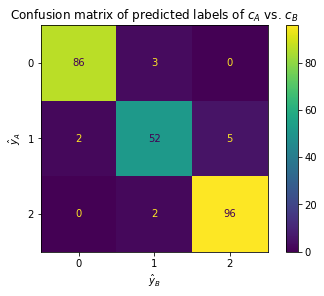

In [4]:
comparer.plot_confusion_matrix(X)

In [5]:
scale_features = {
    'LSTAT': 10,
    'ZN': 1,
    'INDUS': 10,
    'CRIM': 10,
    'TAX': 1,
    'RM': 10,
    'RAD': 1,
    'DIS': 10,
    'AGE': 1,
    'PTRATIO': 10,
    'NOX': 100
}

# Global explanations

## $(0,1)$

In [54]:
focus_class = '(0, 1)'

In [7]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global',
                                          scale_features=scale_features,
                                          focus_class=focus_class, gn_population_size=500)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 54.3 s, sys: 657 ms, total: 55 s
Wall time: 57.1 s


In [55]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [56]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [10]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [11]:
feature_importances = tree.feature_importances_
feature_order = np.flip(np.argsort(feature_importances))

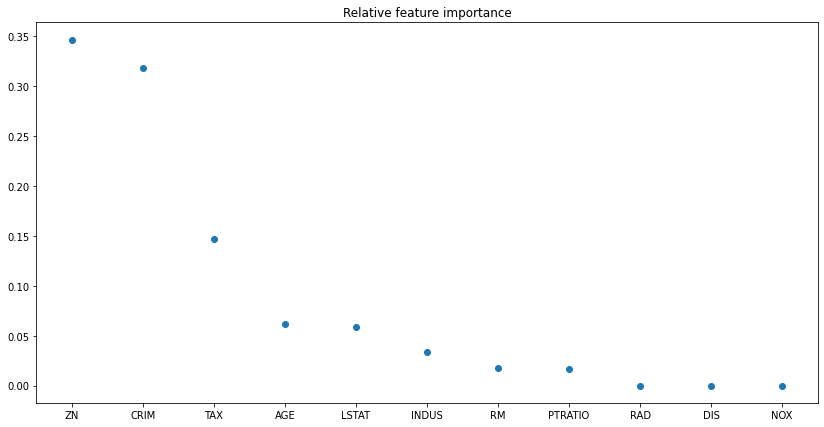

In [12]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

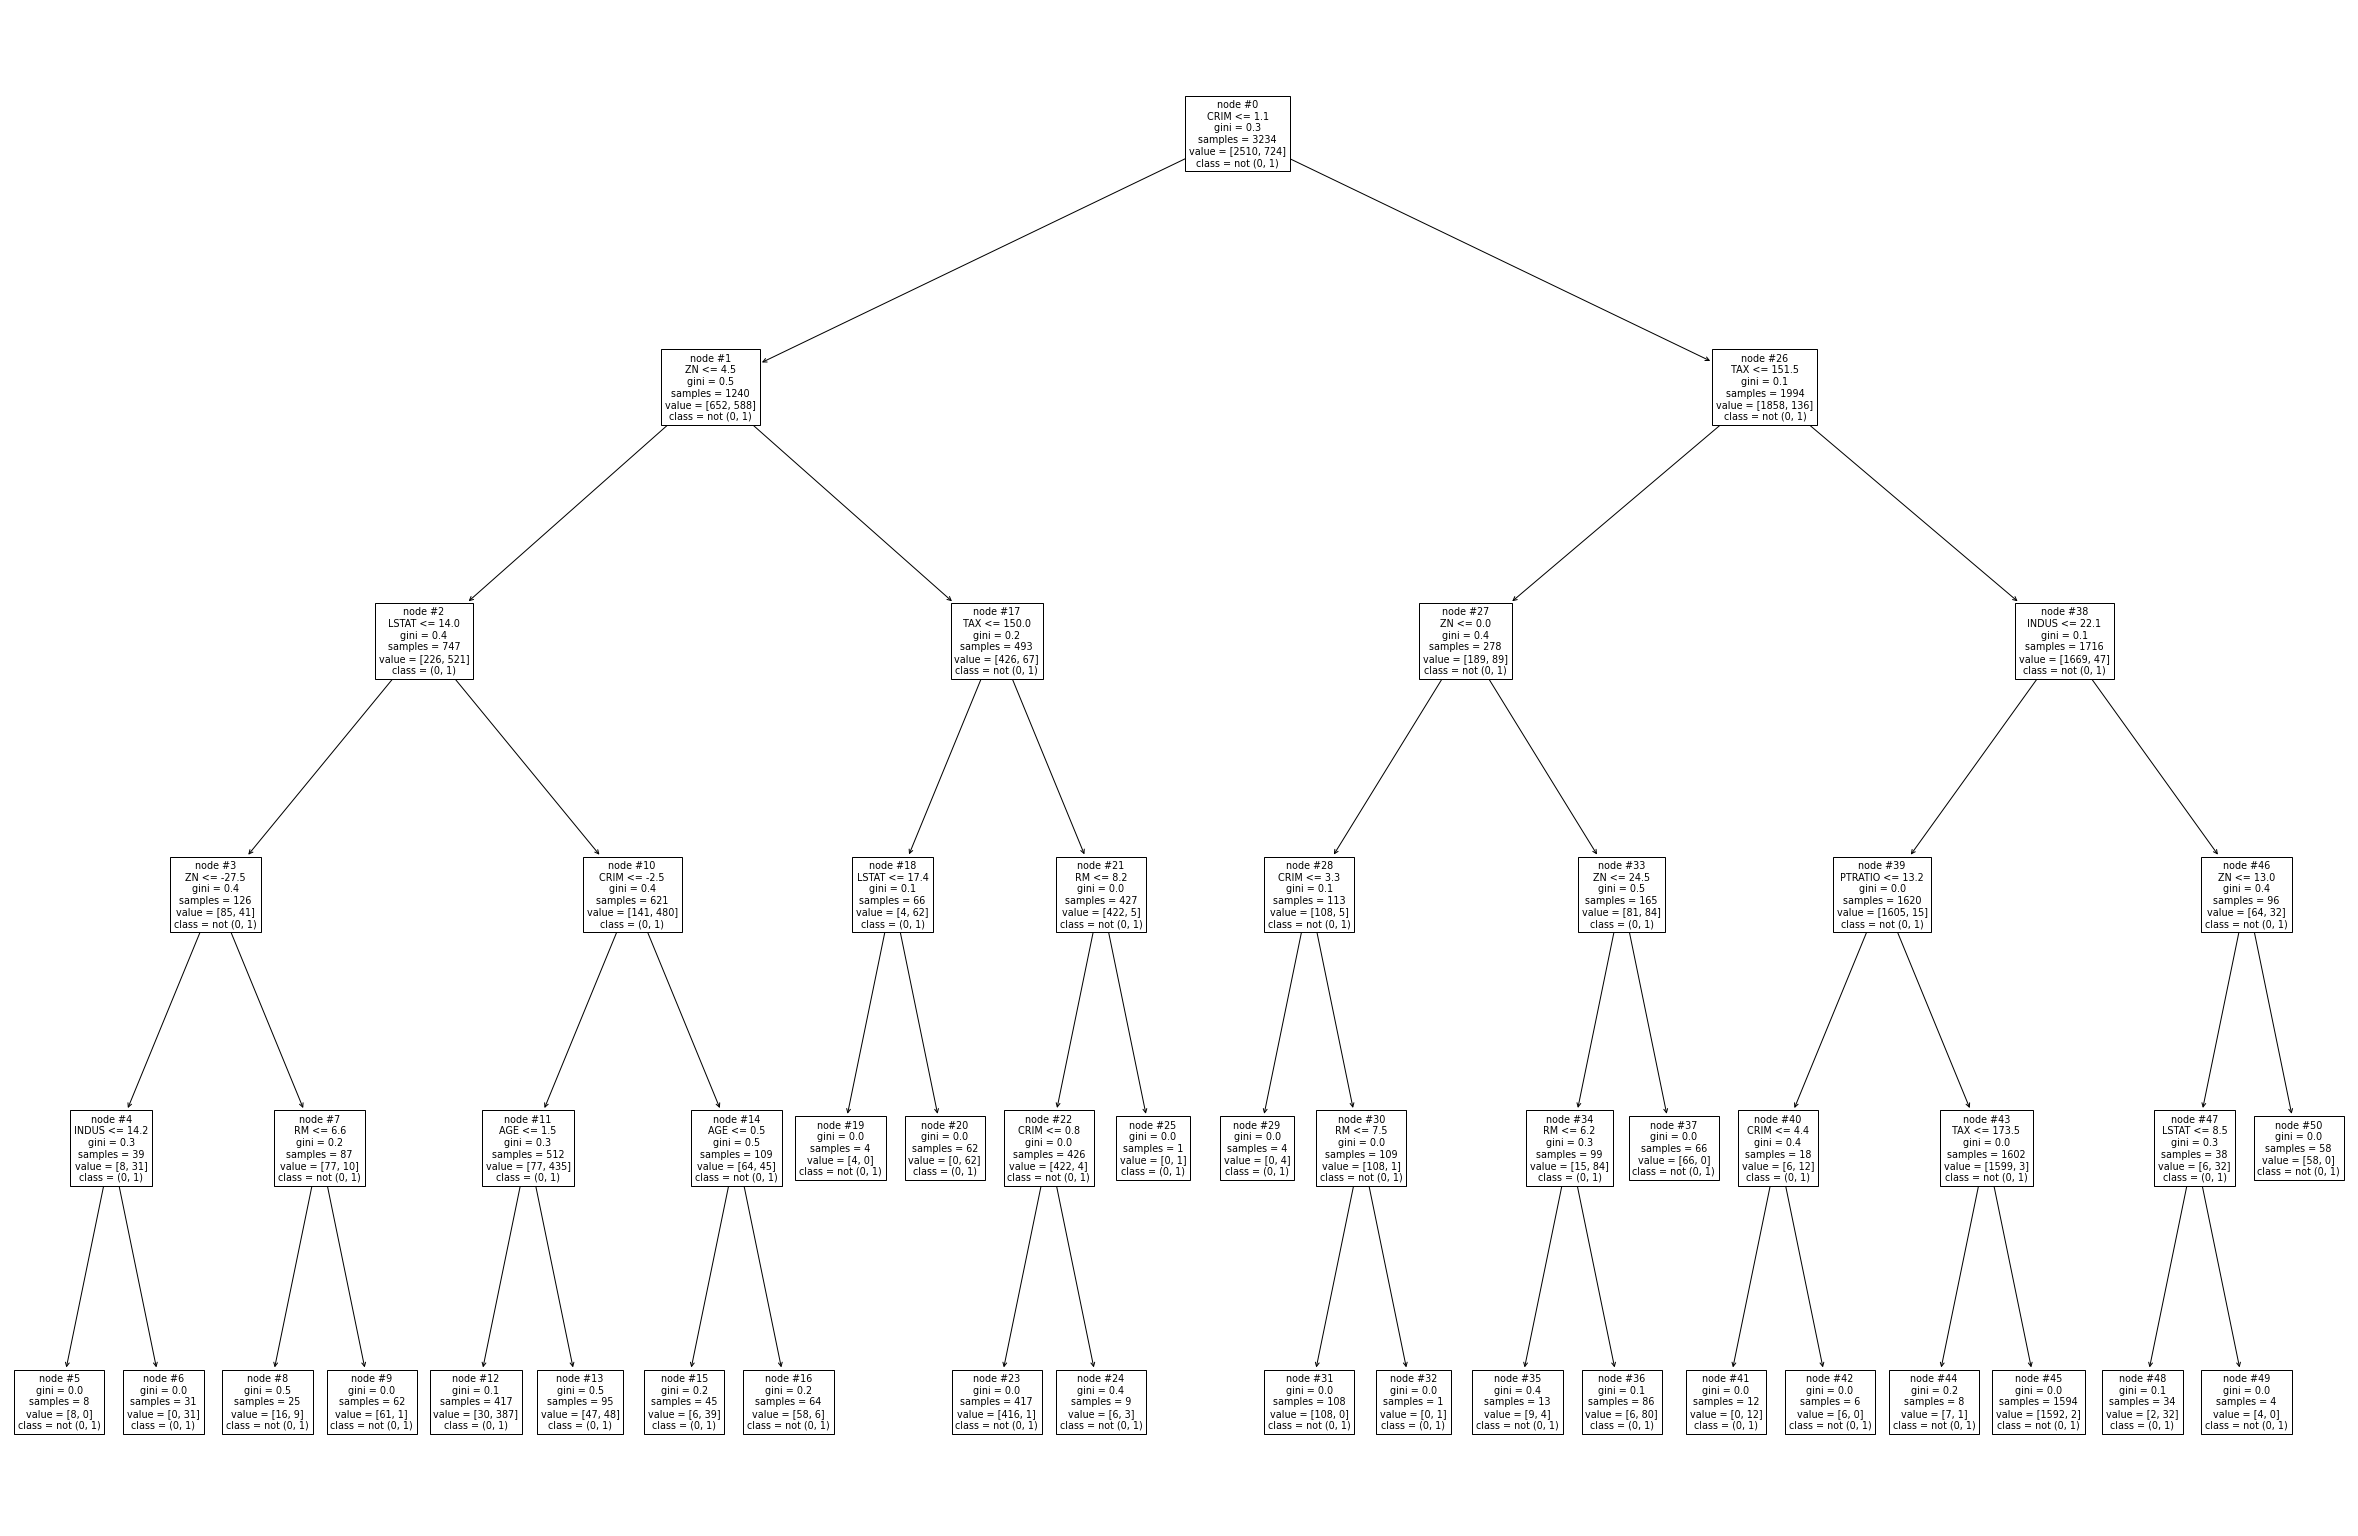

In [13]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [14]:
print_rules(tree, feature_names, class_names, focus_class, feature_order)

node #12: if (ZN <= 4.5) and (CRIM <= -2.55) and (AGE <= 1.5) and (LSTAT > 13.95) then class: (0, 1) (387/417 instances)
node #13: if (ZN <= 4.5) and (CRIM <= -2.55) and (AGE > 1.5) and (LSTAT > 13.95) then class: (0, 1) (48/95 instances)
node #36: if (ZN > 0.0) and (ZN <= 24.5) and (CRIM > 1.05) and (TAX <= 151.5) and (RM > 6.25) then class: (0, 1) (80/86 instances)
node #20: if (ZN > 4.5) and (CRIM <= 1.05) and (TAX <= 150.0) and (LSTAT > 17.45) then class: (0, 1) (62/62 instances)
node #15: if (ZN <= 4.5) and (CRIM > -2.55) and (CRIM <= 1.05) and (AGE <= 0.5) and (LSTAT > 13.95) then class: (0, 1) (39/45 instances)
node #48: if (ZN <= 13.0) and (CRIM > 1.05) and (TAX > 151.5) and (LSTAT <= 8.5) and (INDUS > 22.1) then class: (0, 1) (32/34 instances)
node #6: if (ZN <= -27.5) and (CRIM <= 1.05) and (LSTAT <= 13.95) and (INDUS > 14.25) then class: (0, 1) (31/31 instances)
node #41: if (CRIM > 1.05) and (CRIM <= 4.35) and (TAX > 151.5) and (INDUS <= 22.1) and (PTRATIO <= 13.2) then cla

In [15]:
pd.Series(class_names[y_explain]).value_counts()

not (0, 1)    2510
(0, 1)         724
dtype: int64

In [16]:
(387)/724

0.5345303867403315

Summary: For values of LSTAT above 13.95.

## $(1,0)$

In [17]:
focus_class = '(1, 0)'

In [18]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global',
                                          scale_features=scale_features,
                                          focus_class=focus_class, gn_population_size=500)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 1min 1s, sys: 542 ms, total: 1min 1s
Wall time: 1min 5s


In [19]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [20]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [21]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [22]:
feature_importances = tree.feature_importances_
feature_order = np.flip(np.argsort(feature_importances))

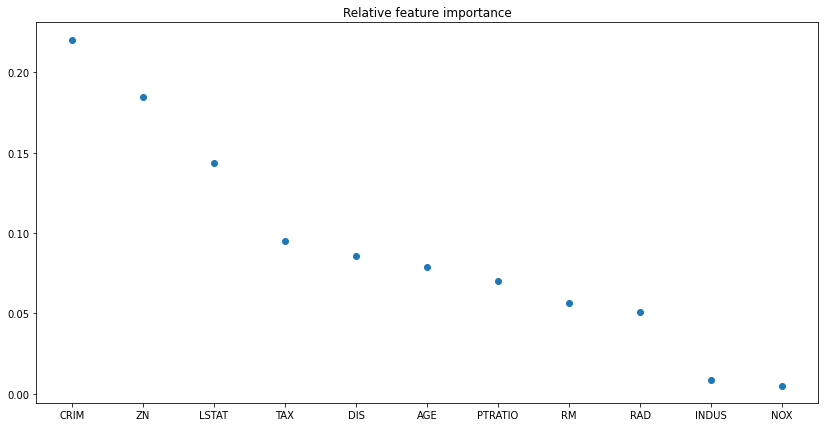

In [23]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

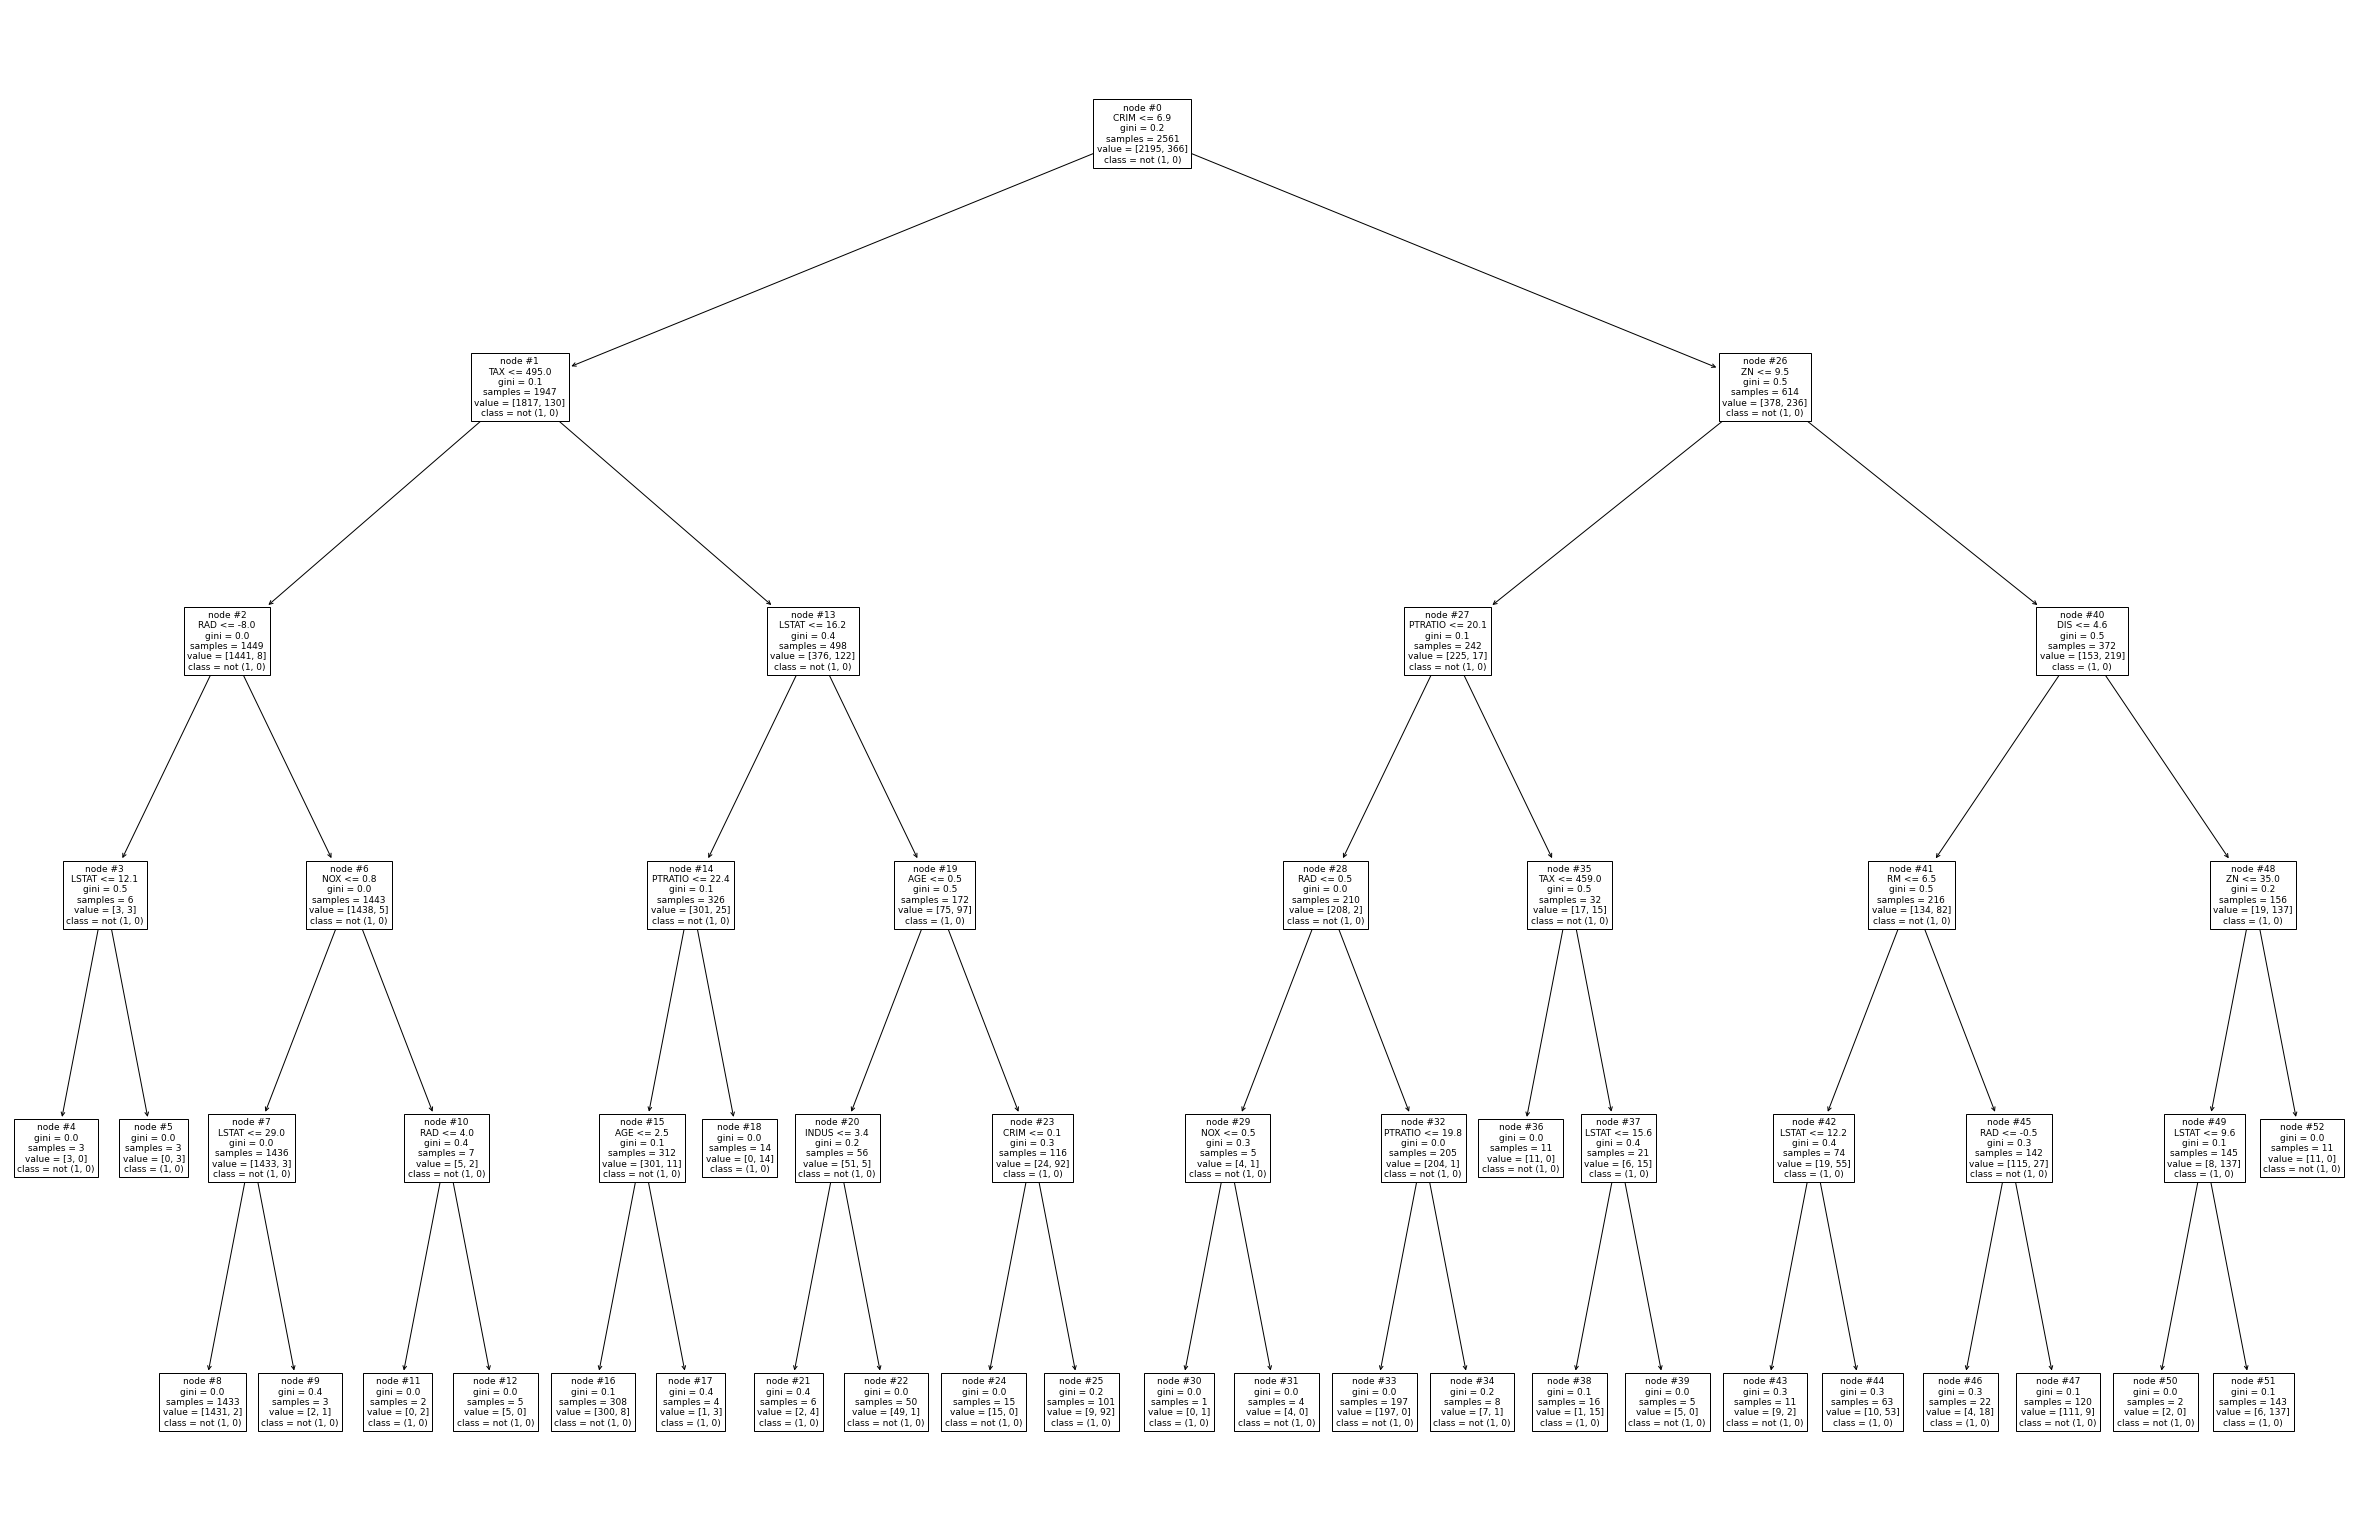

In [24]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [25]:
print_rules(tree, feature_names, class_names, focus_class, feature_order)

node #51: if (CRIM > 6.85) and (ZN > 9.5) and (ZN <= 35.0) and (LSTAT > 9.55) and (DIS > 4.65) then class: (1, 0) (137/143 instances)
node #25: if (CRIM > 0.1) and (CRIM <= 6.85) and (LSTAT > 16.15) and (TAX > 495.0) and (AGE > 0.5) then class: (1, 0) (92/101 instances)
node #44: if (CRIM > 6.85) and (ZN > 9.5) and (LSTAT > 12.2) and (DIS <= 4.65) and (RM <= 6.5) then class: (1, 0) (53/63 instances)
node #46: if (CRIM > 6.85) and (ZN > 9.5) and (DIS <= 4.65) and (RM > 6.5) and (RAD <= -0.5) then class: (1, 0) (18/22 instances)
node #38: if (CRIM > 6.85) and (ZN <= 9.5) and (LSTAT <= 15.6) and (TAX > 459.0) and (PTRATIO > 20.05) then class: (1, 0) (15/16 instances)
node #18: if (CRIM <= 6.85) and (LSTAT <= 16.15) and (TAX > 495.0) and (PTRATIO > 22.45) then class: (1, 0) (14/14 instances)
node #21: if (CRIM <= 6.85) and (LSTAT > 16.15) and (TAX > 495.0) and (AGE <= 0.5) and (INDUS <= 3.4) then class: (1, 0) (4/6 instances)
node #17: if (CRIM <= 6.85) and (LSTAT <= 16.15) and (TAX > 495.

In [26]:
pd.Series(class_names[y_explain]).value_counts()

not (1, 0)    2195
(1, 0)         366
dtype: int64

In [29]:
(137+92+53)/366

0.7704918032786885

The first rule covers the majority of the instances classified $(1,2)$.

Summary: For LSTAT from 9.55 upwards

## $(1,2)$

In [30]:
focus_class = '(1, 2)'

In [31]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global',
                                          scale_features=scale_features,
                                          focus_class=focus_class, gn_population_size=500)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 56 s, sys: 737 ms, total: 56.7 s
Wall time: 59.3 s


In [32]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [33]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [34]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [35]:
feature_importances = tree.feature_importances_
feature_order = np.flip(np.argsort(feature_importances))

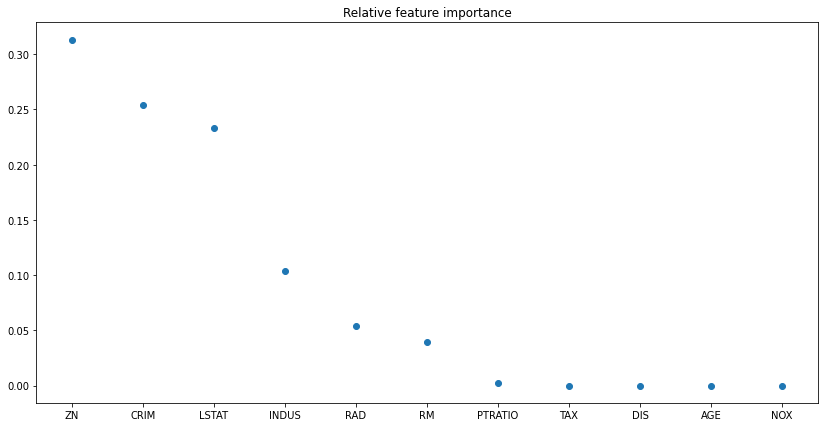

In [36]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

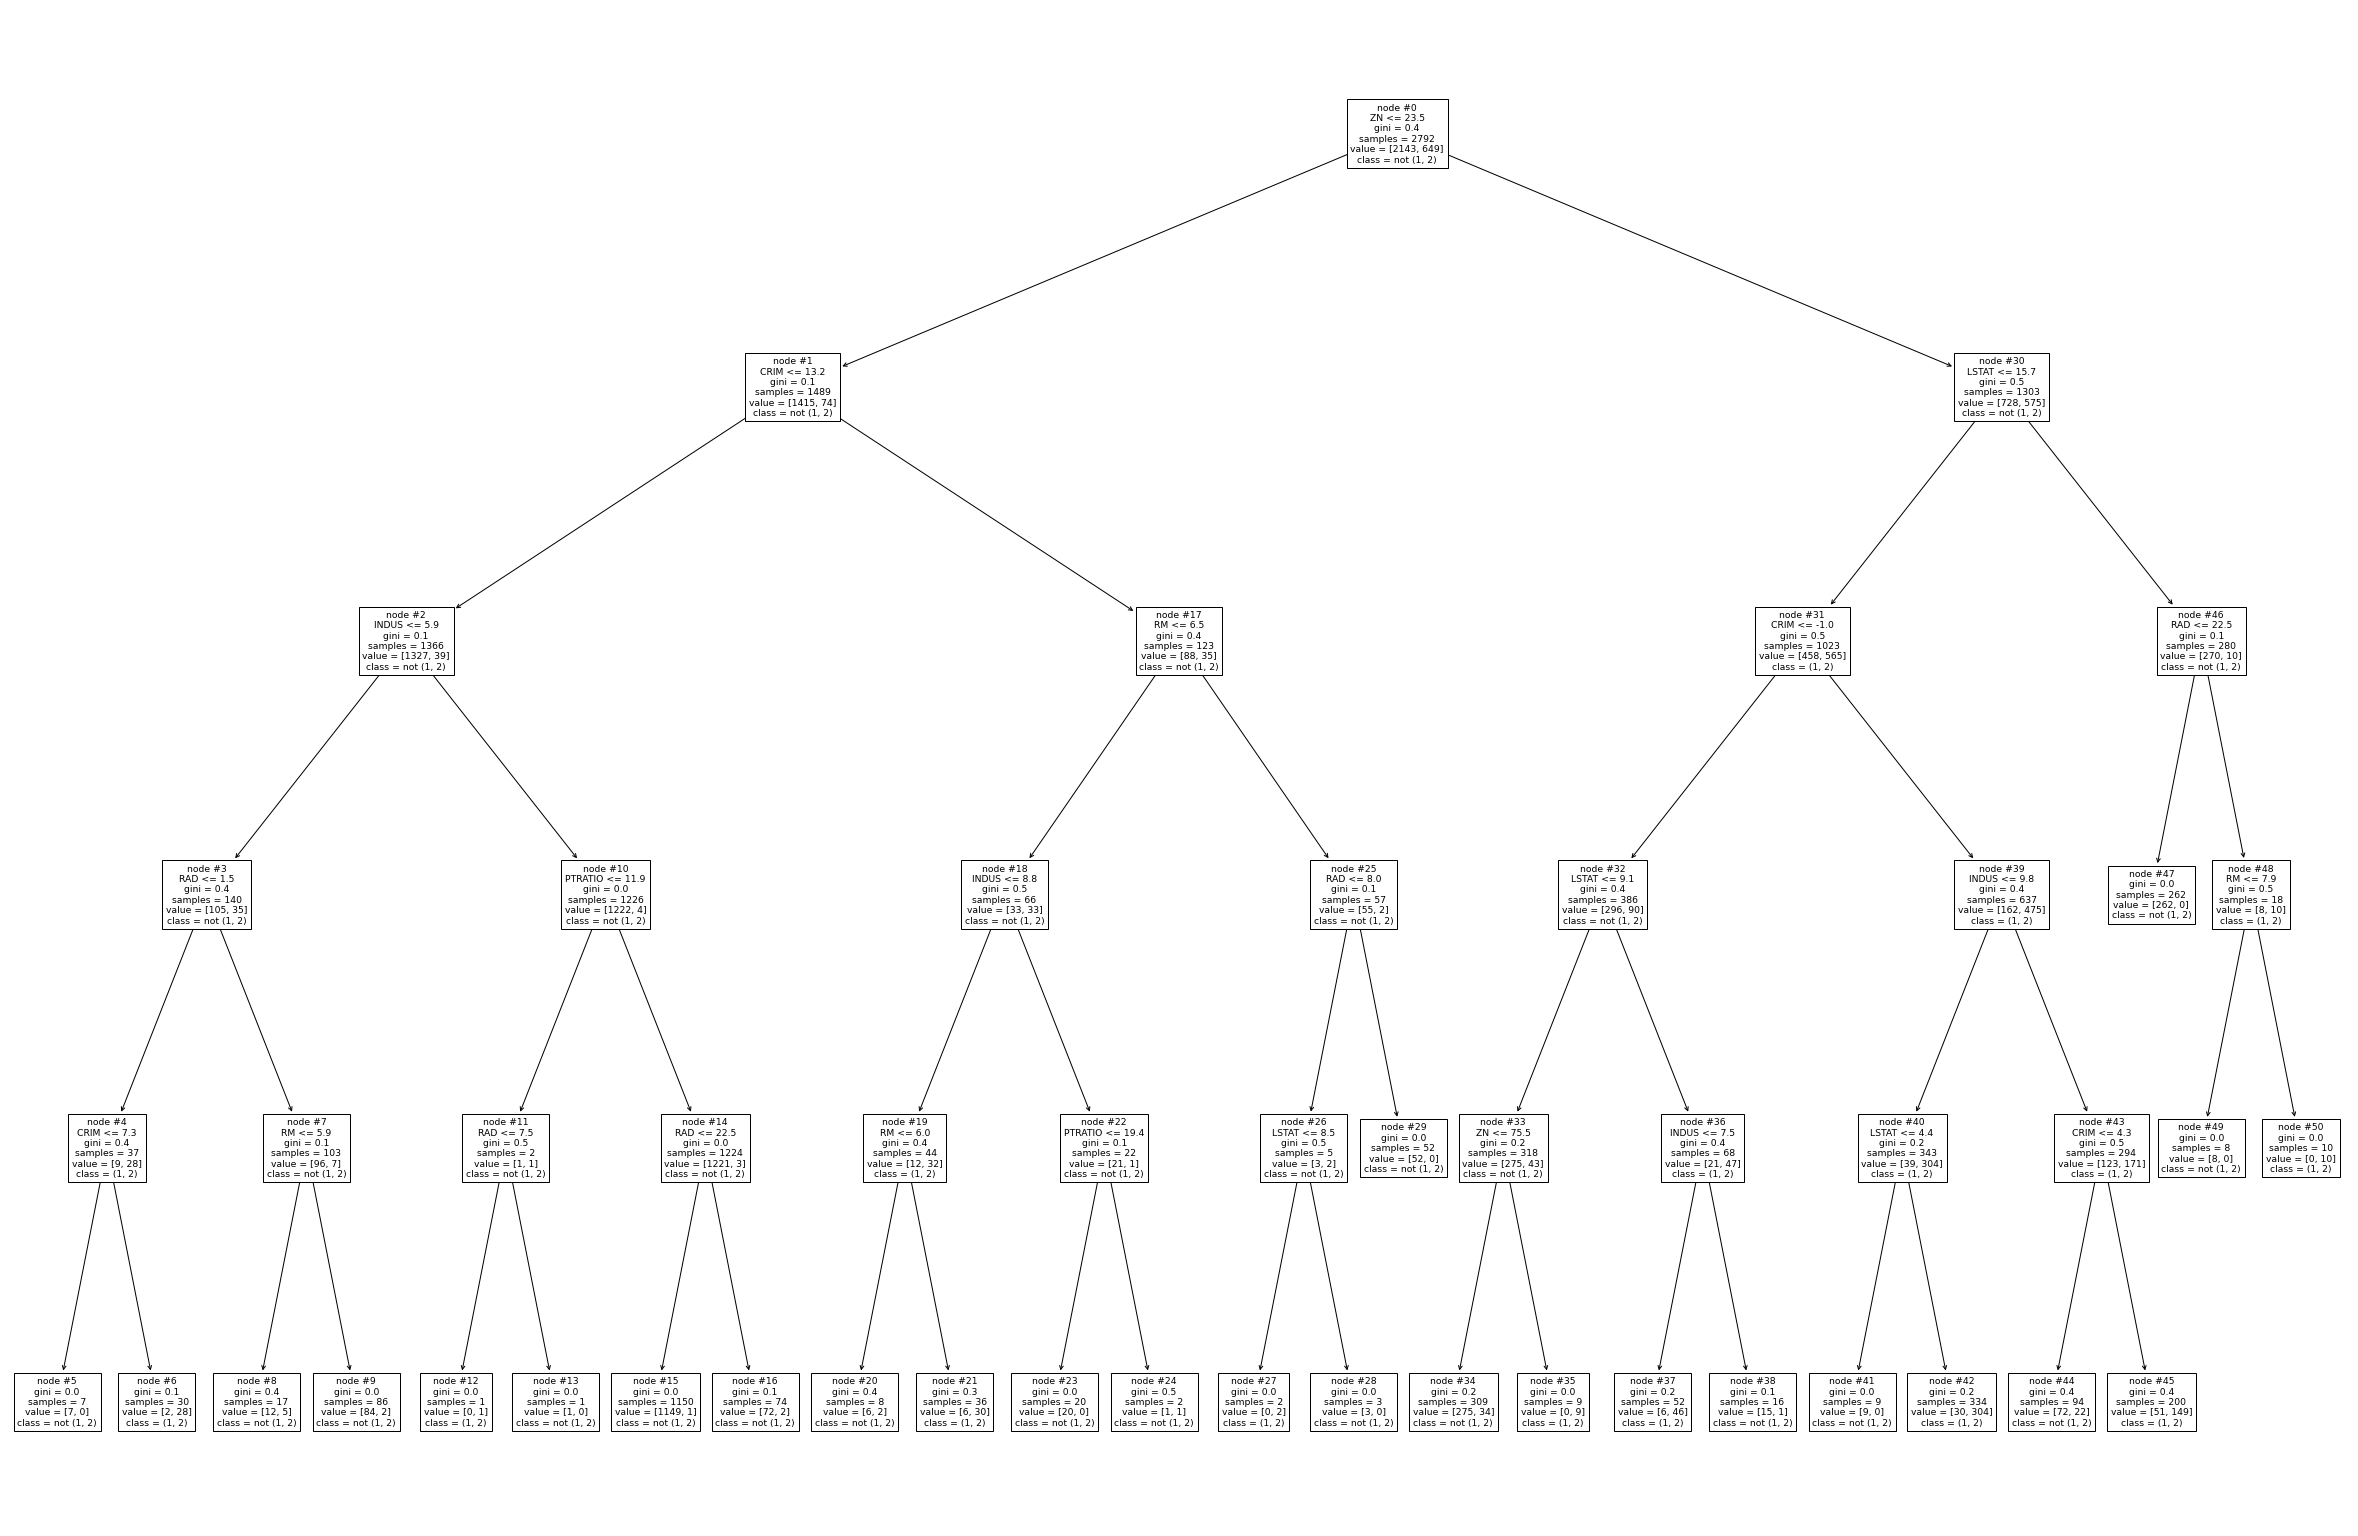

In [37]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [38]:
print_rules(tree, feature_names, class_names, focus_class, feature_order)

node #42: if (ZN > 23.5) and (CRIM > -1.05) and (LSTAT > 4.4) and (LSTAT <= 15.65) and (INDUS <= 9.75) then class: (1, 2) (304/334 instances)
node #45: if (ZN > 23.5) and (CRIM > 4.3) and (LSTAT <= 15.65) and (INDUS > 9.75) then class: (1, 2) (149/200 instances)
node #37: if (ZN > 23.5) and (CRIM <= -1.05) and (LSTAT > 9.1) and (LSTAT <= 15.65) and (INDUS <= 7.45) then class: (1, 2) (46/52 instances)
node #21: if (ZN <= 23.5) and (CRIM > 13.25) and (INDUS <= 8.75) and (RM > 6.05) and (RM <= 6.55) then class: (1, 2) (30/36 instances)
node #6: if (ZN <= 23.5) and (CRIM > 7.35) and (CRIM <= 13.25) and (INDUS <= 5.85) and (RAD <= 1.5) then class: (1, 2) (28/30 instances)
node #50: if (ZN > 23.5) and (LSTAT > 15.65) and (RAD > 22.5) and (RM > 7.9) then class: (1, 2) (10/10 instances)
node #35: if (ZN > 75.5) and (CRIM <= -1.05) and (LSTAT <= 9.1) then class: (1, 2) (9/9 instances)
node #27: if (ZN <= 23.5) and (CRIM > 13.25) and (LSTAT <= 8.5) and (RAD <= 8.0) and (RM > 6.55) then class: (1

In [39]:
pd.Series(class_names[y_explain]).value_counts()

not (1, 2)    2143
(1, 2)         649
dtype: int64

In [41]:
(304+149)/649

0.6979969183359014

Summary: For LSTAT up to 15.65

## $(2,1)$

In [42]:
focus_class = '(2, 1)'

In [43]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global',
                                          scale_features=scale_features,
                                          focus_class=focus_class, gn_population_size=500)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 54.4 s, sys: 547 ms, total: 55 s
Wall time: 56.9 s


In [44]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [45]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [46]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [47]:
feature_importances = tree.feature_importances_
feature_order = np.flip(np.argsort(feature_importances))

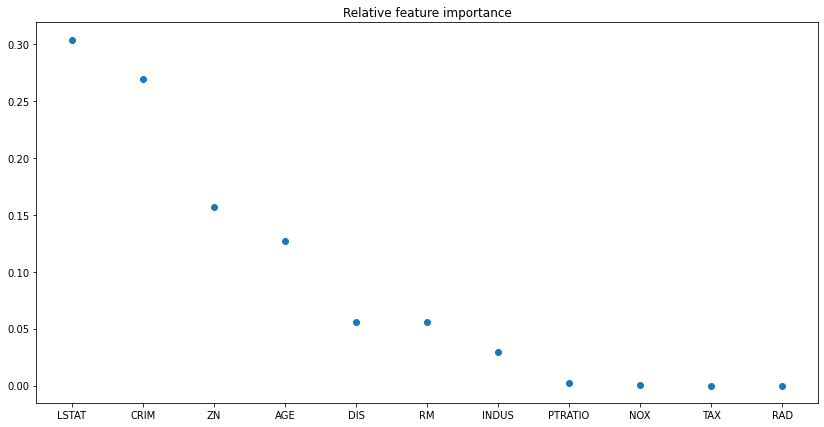

In [48]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

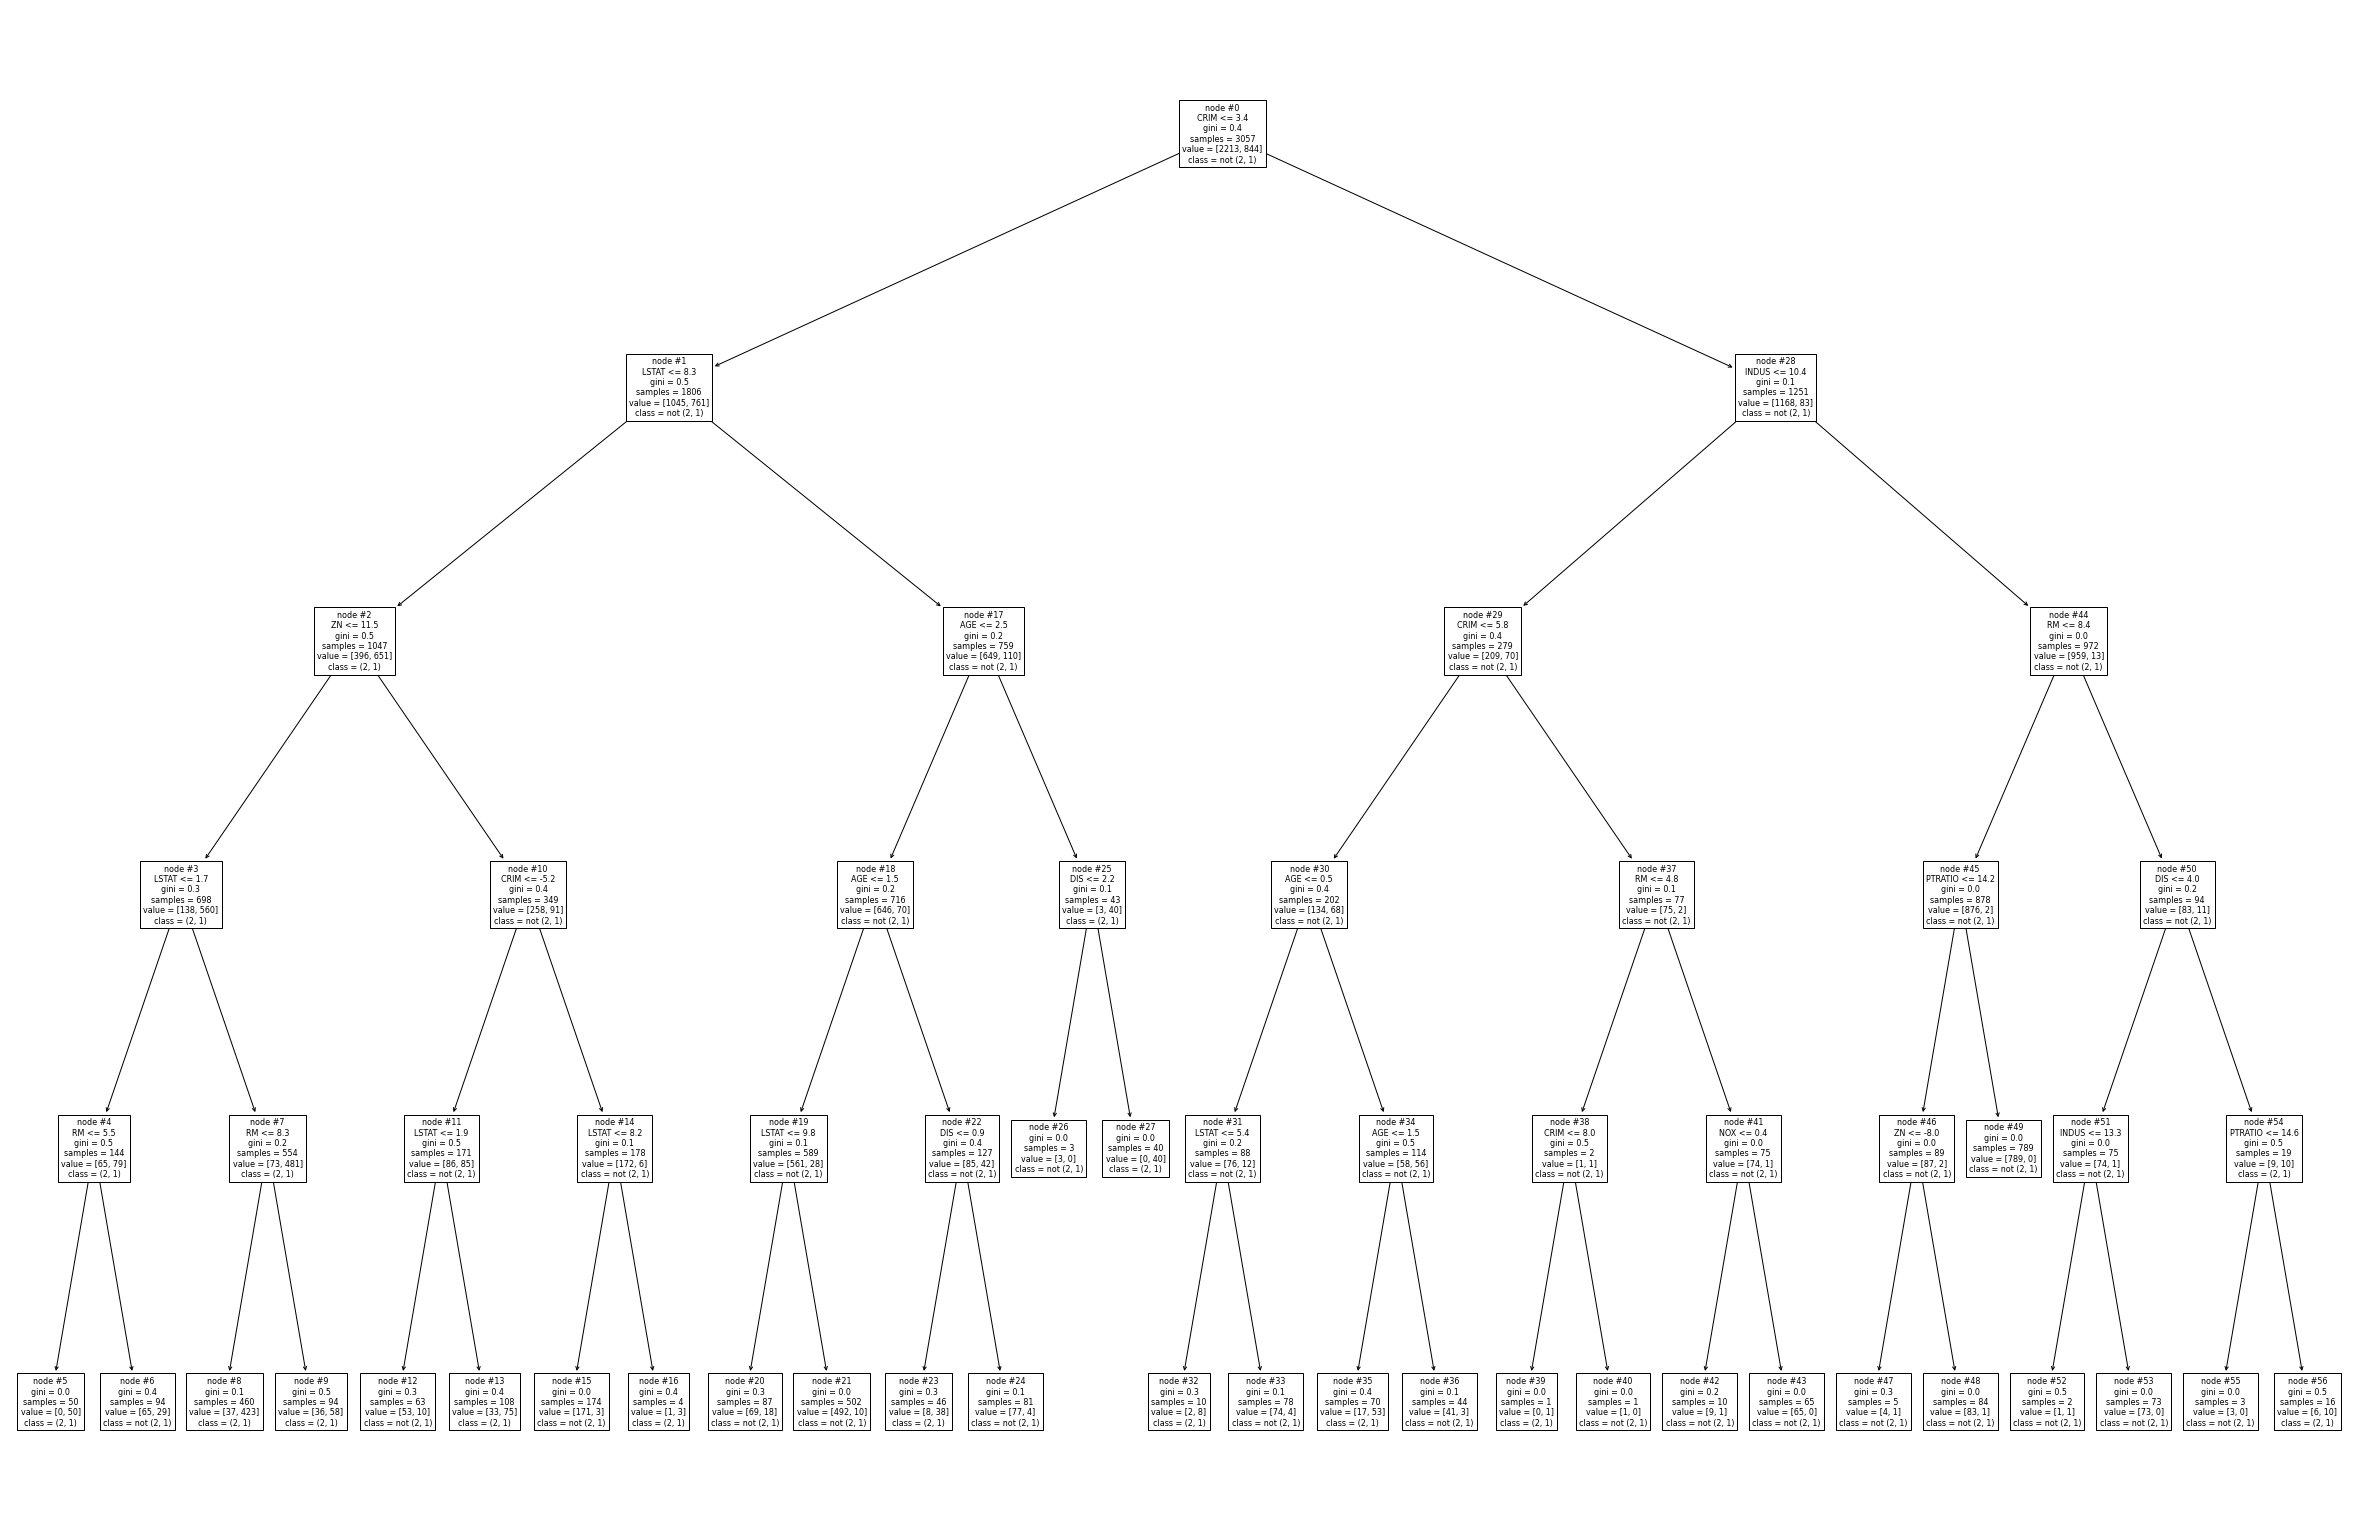

In [49]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [50]:
print_rules(tree, feature_names, class_names, focus_class, feature_order)

node #8: if (LSTAT > 1.65) and (LSTAT <= 8.3) and (CRIM <= 3.35) and (ZN <= 11.5) and (RM <= 8.3) then class: (2, 1) (423/460 instances)
node #13: if (LSTAT > 1.95) and (LSTAT <= 8.3) and (CRIM <= -5.25) and (ZN > 11.5) then class: (2, 1) (75/108 instances)
node #9: if (LSTAT > 1.65) and (LSTAT <= 8.3) and (CRIM <= 3.35) and (ZN <= 11.5) and (RM > 8.3) then class: (2, 1) (58/94 instances)
node #35: if (CRIM > 3.35) and (CRIM <= 5.8) and (AGE > 0.5) and (AGE <= 1.5) and (INDUS <= 10.45) then class: (2, 1) (53/70 instances)
node #5: if (LSTAT <= 1.65) and (CRIM <= 3.35) and (ZN <= 11.5) and (RM <= 5.45) then class: (2, 1) (50/50 instances)
node #23: if (LSTAT > 8.3) and (CRIM <= 3.35) and (AGE > 1.5) and (AGE <= 2.5) and (DIS <= 0.85) then class: (2, 1) (38/46 instances)
node #27: if (LSTAT > 8.3) and (CRIM <= 3.35) and (AGE > 2.5) and (DIS > 2.25) then class: (2, 1) (40/40 instances)
node #56: if (CRIM > 3.35) and (DIS > 3.95) and (RM > 8.4) and (INDUS > 10.45) and (PTRATIO > 14.65) the

In [51]:
pd.Series(class_names[y_explain]).value_counts()

not (2, 1)    2213
(2, 1)         844
dtype: int64

In [53]:
(423)/844

0.5011848341232228

Summary: For LSTAT between 1.65 and 8.3